# Fall 2022 Data Science Intern Challenge 

## 0. Setup and Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading the Data

I have downloaded the data as a csv file named "sneaker_data.csv". We can use pandas to load the csv file into a dataframe to make it easier to work with.

In [39]:
def load_data(file_path: str) -> pd.DataFrame:
    """Loads a csv file into a pandas dataframe"""
    return pd.read_csv(file_path)

In [40]:
data = load_data(file_path="sneaker_data.csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


We have successfully loaded the data into a pandas dataframe. Now lets try calculating the Average Order Value using the method the Shopify team used.

## 2. Calculating the Average Order Value (Original Method)

Calculating the AOV is straightforward, it is simply:

$\text{AOV} = \frac{\text{Revenue}}{\text{Number of Orders}}$

If you analyze this closely, this is just calculating the mean of of the order_amount column.

In [41]:
def calculate_AOV(data: pd.DataFrame) -> float:
    """Calculates the average order value"""
    return data["order_amount"].mean()

In [42]:
aov = calculate_AOV(data)
print(aov)

3145.128


Our findings are as consistent with the Shopify team's findings. We now need to figure out why the value of the AOV is so high given that sneakers are a relatively cheap commodity.

## 3. Data Analysis

We can start off with the describe method each pandas dataframe has. It will give us some important statistics about the numeric columns in the dataframe.

In [43]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


I beleive we have found the problem. The AOV is high because of outliers in the `order_amount` column. We can clearly see that the maximum order value is over 700,000. Columns like these bring up the average. 

Let's get a better understanding by creating a histogram:

In [44]:
def plot_histogram(df: pd.DataFrame, column: str, bins: int = 50) -> None:
    """Plots a histogram of the data"""
    df[column].hist(bins=bins)

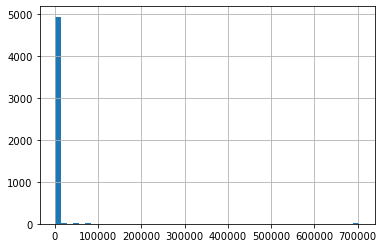

In [45]:
plot_histogram(data, "order_amount")

I think this confirms our hypothesis. We can see that the histogram is severly skewed. 

The next step will be to find a better metric to evaluate this data.

## 4. Creating a better metric

A good metric must provide insight into the data while being easy to understand at the same time. So we need to ensure that our metric is both meaningful and understandable.

As we saw earlier, the AOV is essentially the mean of the order_amount column. The mean of a distribution is notorious for being suseptible to outliers. 

I beleive that the solution to this is simple. We can simply use the median instead of the mean. The outliers do not affect the median. This makes sense because the median depends primarily on the order of the data. Changing the highest order value does not affect the order of the values.

In [46]:
def calculate_median(df: pd.DataFrame, column: str) -> float:
    """Calculates the median of the data"""
    return df[column].median()

In [47]:
calculate_median(data, "order_amount")

284.0

Wow! This is much better. 284 makes a lot of sense considering the low price of sneakers.

Just out of curiosity, let's also try to calulate the mode and see that result we get:

In [48]:
def calculate_mode(df: pd.DataFrame, column: str) -> float:
    """Calculates the median of the data"""
    return df[column].mode()

In [49]:
calculate_mode(data, "order_amount")

0    153
dtype: int64

Not great. I think we should stick to the median.

## 5. Final Function and Results

Lets write the final function to calculate the new metric (the median):

In [50]:
def order_value_median(df: pd.DataFrame) -> float:
    """Calculates the mean of the order value"""
    return df["order_amount"].median()

In [51]:
order_value_median(data)

284.0

Now that we have working metric. Lets do a final summary of our problem, solution and results:

* Problem: The AOV is high (3145.128) because of outliers in the `order_amount` column.

* Solution: Using the median instead of the AOV (which is based on the mean).

* Results: The new metric gives a value of 284 instead of 3145.128.